<a href="https://colab.research.google.com/github/surazzpande/Bigdata_Assignment/blob/main/BigdataPart1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive

In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
pip install pyspark

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 317.0/317.0 MB 2.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyspark: filename=pyspark-3.5.1-py2.py3-none-any.whl size=317488491 sha256=0e2862dfe7b8246edf708dc8f074017f3bb9fba16ec701b807a6840401376bfb
  Stored in directory: /root/.cache/pip/wheels/80/1d/60/2c256ed38dddce2fdd93be545214a63e02fbd8d74fb0b7f3a6
Successfully built pyspark


In [ ]:
#Load Dataset1.csv

In [ ]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import col, when , trim

In [ ]:
spark = SparkSession.builder.appName("Assignment2").getOrCreate()

In [ ]:
df_spark = spark.read.csv('/content/drive/MyDrive/Big Data/dataset1.csv', header = True, inferSchema = True)

In [ ]:
df_spark.show()

+---+------+----+---+---+---+---+---+----+---+
| X1|    X2|  X3| X4| X5| X6| X7| X8|  X9| Y1|
+---+------+----+---+---+---+---+---+----+---+
| 59|28.378|0.34|204|196|132| 49| 92| 7.7|  1|
| 59|24.968|   1|147|181|129| 34| 96|4.09|  1|
| 48|31.307|0.62|155|185|127| 41|139| 4.5|  1|
| 47|27.837|0.38|488|254|158| 55|250| 5.3|  2|
| 55|22.662|0.49| 87|175|120| 44| 99| 6.9|  1|
| 68|23.985| 1.2| 96|193|135| 48|125| 7.9|  2|
| 58|22.096|0.09| 70|200|133| 60|154| 7.0|  2|
| 48|28.577|0.12|139|151| 95| 37|102| 5.6|  1|
| 63|25.034|    |243|195|129| 45| 91| 6.9|  1|
| 53|27.253| 1.3| 93|151| 91| 55|100|9.19|  2|
| 57|30.538| 5.1|194|250|178| 51| 93|13.5|  2|
| 65|24.309| 1.6| 74|173|121| 43|114| 6.4|  2|
| 68|22.888|0.77| 87|196|129| 55|144| 9.8|  2|
| 68|  28.3|0.97|152|180|125| 37| 88| 4.3|  2|
| 64|25.852| 2.3| 93|187|136| 40| 99|8.69|  2|
| 67|20.716| 0.5|112|219|137| 69| 98| 8.5|  1|
| 61|24.204| 1.5|140|208|149| 38|136|11.5|  1|
| 51|25.829| 2.6| 79|248|185| 44|105| 7.8|  1|
| 33|24.843| 

In [ ]:
#Replace the empty string with null Values

In [ ]:
for c in df_spark.columns:
    df_spark = df_spark.withColumn(c, when(trim(col(c)) == '', None).otherwise(col(c)))

In [ ]:
#After replacing with null values

In [ ]:
df_spark.show()

+---+------+----+---+---+---+---+---+----+---+
| X1|    X2|  X3| X4| X5| X6| X7| X8|  X9| Y1|
+---+------+----+---+---+---+---+---+----+---+
| 59|28.378|0.34|204|196|132| 49| 92| 7.7|  1|
| 59|24.968|   1|147|181|129| 34| 96|4.09|  1|
| 48|31.307|0.62|155|185|127| 41|139| 4.5|  1|
| 47|27.837|0.38|488|254|158| 55|250| 5.3|  2|
| 55|22.662|0.49| 87|175|120| 44| 99| 6.9|  1|
| 68|23.985| 1.2| 96|193|135| 48|125| 7.9|  2|
| 58|22.096|0.09| 70|200|133| 60|154| 7.0|  2|
| 48|28.577|0.12|139|151| 95| 37|102| 5.6|  1|
| 63|25.034|NULL|243|195|129| 45| 91| 6.9|  1|
| 53|27.253| 1.3| 93|151| 91| 55|100|9.19|  2|
| 57|30.538| 5.1|194|250|178| 51| 93|13.5|  2|
| 65|24.309| 1.6| 74|173|121| 43|114| 6.4|  2|
| 68|22.888|0.77| 87|196|129| 55|144| 9.8|  2|
| 68|  28.3|0.97|152|180|125| 37| 88| 4.3|  2|
| 64|25.852| 2.3| 93|187|136| 40| 99|8.69|  2|
| 67|20.716| 0.5|112|219|137| 69| 98| 8.5|  1|
| 61|24.204| 1.5|140|208|149| 38|136|11.5|  1|
| 51|25.829| 2.6| 79|248|185| 44|105| 7.8|  1|
| 33|24.843| 

In [ ]:
#Removing all the row with null/missing values

In [ ]:
df_rows_removed = df_spark.na.drop()

In [ ]:
total_rows_before_removed = df_spark.count()

In [ ]:
removed_rows_count = df_rows_removed.count()

In [ ]:
total_rows_removed = total_rows_before_removed-removed_rows_count

In [ ]:
print(f"Number of rows removed :{total_rows_removed}")

Number of rows removed :58


In [ ]:
#Replace the table name

In [ ]:
df = df_rows_removed

In [ ]:
df.show()

+---+------+----+---+---+---+---+---+----+---+
| X1|    X2|  X3| X4| X5| X6| X7| X8|  X9| Y1|
+---+------+----+---+---+---+---+---+----+---+
| 59|28.378|0.34|204|196|132| 49| 92| 7.7|  1|
| 59|24.968|   1|147|181|129| 34| 96|4.09|  1|
| 48|31.307|0.62|155|185|127| 41|139| 4.5|  1|
| 47|27.837|0.38|488|254|158| 55|250| 5.3|  2|
| 55|22.662|0.49| 87|175|120| 44| 99| 6.9|  1|
| 68|23.985| 1.2| 96|193|135| 48|125| 7.9|  2|
| 58|22.096|0.09| 70|200|133| 60|154| 7.0|  2|
| 48|28.577|0.12|139|151| 95| 37|102| 5.6|  1|
| 53|27.253| 1.3| 93|151| 91| 55|100|9.19|  2|
| 57|30.538| 5.1|194|250|178| 51| 93|13.5|  2|
| 65|24.309| 1.6| 74|173|121| 43|114| 6.4|  2|
| 68|22.888|0.77| 87|196|129| 55|144| 9.8|  2|
| 68|  28.3|0.97|152|180|125| 37| 88| 4.3|  2|
| 64|25.852| 2.3| 93|187|136| 40| 99|8.69|  2|
| 67|20.716| 0.5|112|219|137| 69| 98| 8.5|  1|
| 61|24.204| 1.5|140|208|149| 38|136|11.5|  1|
| 51|25.829| 2.6| 79|248|185| 44|105| 7.8|  1|
| 33|24.843| 1.2|149|191|132| 41| 87|14.1|  1|
| 46|25.501| 

In [ ]:
#Summary Statistics_and_Histogram of X1

In [ ]:
import pyspark.sql.functions as F
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from pyspark.sql.functions import skewness, kurtosis
from collections import Counter

In [ ]:
#Calculate summary statistics

In [ ]:
min_value = df.select(F.min("X1")).collect()[0][0]
max_value = df.select(F.max("X1")).collect()[0][0]
mean_value = df.select(F.avg("X1")).collect()[0][0]
median_value = df.select(F.expr("percentile_approx(X1, 0.5)")).collect()[0][0]
variance = df.select(F.variance("X1")).collect()[0][0]
std_deviation = df.select(F.stddev("X1")).collect()[0][0]



In [ ]:
#Show summary statistics

In [ ]:
print("Min value: ", min_value)
print("Max value: ", max_value)
print("Mean value: ", mean_value)
print("Median value: ", median_value)
print("Variance: ", variance)
print("Standard deviation: ", std_deviation)

Min value:  21
Max value:  90
Mean value:  53.340715009408015
Median value:  53
Variance:  75.91140082047643
Standard deviation:  8.712714893790364


In [ ]:
#Select the X1 column and convert it to a list

In [ ]:
# calculate the skewness and kurtosis
skewness_kurtosis = df.select(
    skewness("X1").alias("skewness"),
    kurtosis("X1").alias("kurtosis")
).collect()[0]

print(f'Skewness: {skewness_kurtosis["skewness"]:.3f}')
print(f'Kurtosis: {skewness_kurtosis["kurtosis"]:.3f}')

Skewness: 0.179
Kurtosis: 0.309


In [ ]:
# Calculate the frequency of each value in the 'X1' column
x1_counts = df.groupBy("X1").count().collect()

In [ ]:
# Find the maximum frequency
max_frequency = max(x1_counts, key=lambda x: x[1])[1]

In [ ]:
# Find modes by filtering values with maximum frequency
modes = [x[0] for x in x1_counts if x[1] == max_frequency]

In [ ]:
# Print the number of modes
print(f'Number of modes: {len(modes)}')

Number of modes: 1


In [ ]:
x1_data = df.select("X1").rdd.flatMap(lambda x: x).collect()

In [ ]:
# Create a histogram of the X1 data

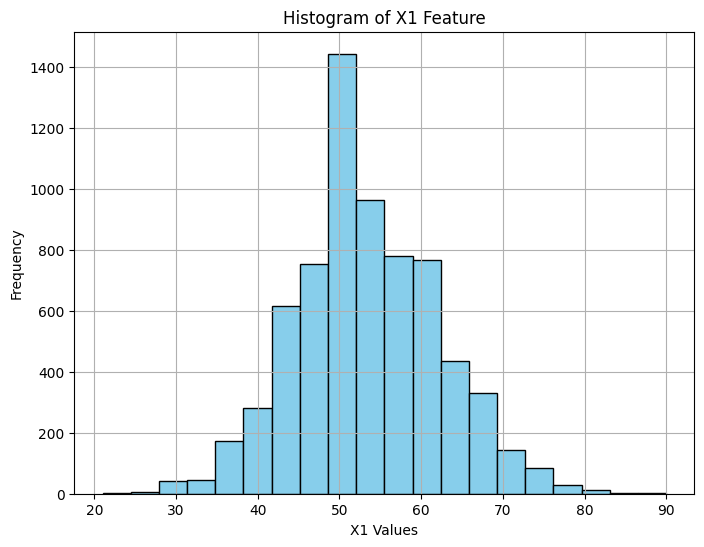

In [ ]:
plt.figure(figsize=(8, 6))
plt.hist(x1_data, bins=20, color='skyblue', edgecolor='black')
plt.title('Histogram of X1 Feature')
plt.xlabel('X1 Values')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


In [ ]:
# Calculate quartiles
# from pyspark.sql.functions import percentile_approx

In [ ]:
quartiles = df.approxQuantile("X2", [0.25, 0.5, 0.75], 0.0)
q1, median, q3 = quartiles

In [ ]:
# Print quartile values

In [ ]:
print("Quartile Information for X2 feature:")
print(f"First Quartile (Q1): {q1}")
print(f"Median (Q2): {median}")
print(f"Third Quartile (Q3): {q3}")

Quartile Information for X2 feature:
First Quartile (Q1): 22.975
Median (Q2): 24.704
Third Quartile (Q3): 26.435


In [ ]:
# Generate boxplot

In [ ]:
 x2_data = df.select('X2').rdd.flatMap(lambda row: row).collect()

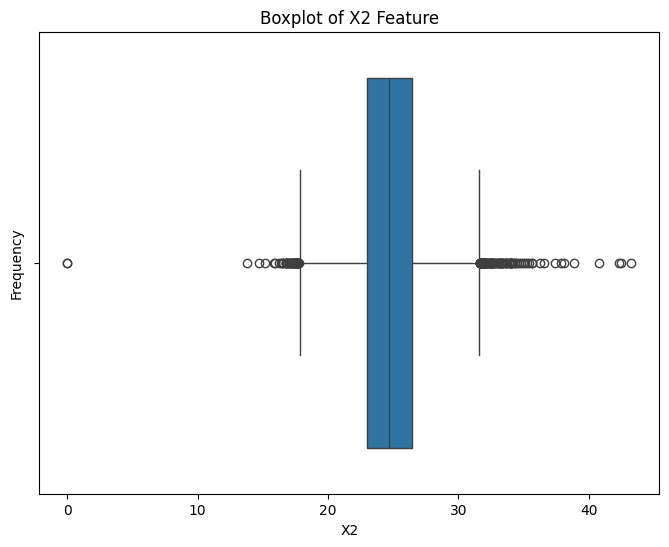

In [ ]:
plt.figure(figsize=(8, 6))
sns.boxplot(x=x2_data)
plt.title('Boxplot of X2 Feature')
plt.xlabel('X2')
plt.ylabel('Frequency')
plt.show()

In [ ]:
# Use filter and count methods


In [ ]:
count = df.filter((df['X1'] > 50) & (df['Y1'] == 1)).count()

In [ ]:
# Display the count

In [ ]:
print("Number of rows where 'X1' is greater than 50 and 'Y1' equals 1:", count)

Number of rows where 'X1' is greater than 50 and 'Y1' equals 1: 2166


In [ ]:
#Load dataset

In [ ]:
from pyspark.ml.feature import StringIndexer, VectorAssembler
from pyspark.ml.classification import LogisticRegression, RandomForestClassifier
from pyspark.ml.evaluation import BinaryClassificationEvaluator, MulticlassClassificationEvaluator

In [ ]:
# Convert string columns to numerical columns using StringIndexer

In [ ]:
indexers = [StringIndexer(inputCol=c, outputCol=f'{c}_index').fit(df) for c in ['X3', 'X5', 'X8']]
indexed_df = df
for indexer in indexers:
    indexed_df = indexer.transform(indexed_df)

In [ ]:
# Select the indexed columns and the label column


In [ ]:
indexed_cols = ['Y1'] + [indexer.getOutputCol() for indexer in indexers]
indexed_df = indexed_df.select(indexed_cols)

In [ ]:
# Create a vector assembler to combine all other columns as predictors

In [ ]:
assembler = VectorAssembler(inputCols=[x for x in indexed_cols if x != 'Y1'], outputCol='features')


In [ ]:
# Apply the vector assembler to the DataFrame

In [ ]:
assembled_df = assembler.transform(indexed_df)

In [ ]:
# Split the data into training and test sets


In [ ]:
train, test = assembled_df.randomSplit([0.7, 0.3])

In [ ]:
# Create a logistic regression model

In [ ]:
lr = LogisticRegression(featuresCol='features', labelCol='Y1')

In [ ]:
# Create a random forest classifier model

In [ ]:
rf = RandomForestClassifier(featuresCol='features', labelCol='Y1', maxBins=300)


In [ ]:
# Fit the models to the training data

In [ ]:
lrModel = lr.fit(train)
rfModel = rf.fit(train)

In [ ]:
# Make predictions on the test data

In [ ]:
lrPredictions = lrModel.transform(test)
rfPredictions = rfModel.transform(test)

In [ ]:
# Create the evaluator for AUC

In [ ]:
evaluator = BinaryClassificationEvaluator(labelCol="Y1", rawPredictionCol="prediction")

In [ ]:
# Evaluate logistic regression model

In [ ]:
lrAUC = evaluator.evaluate(lrPredictions)


In [ ]:
# Evaluate random forest model AUC

In [ ]:
rfAUC = evaluator.evaluate(rfPredictions)

In [ ]:
# Create the evaluator for precision

In [ ]:
precisionEvaluator = BinaryClassificationEvaluator(labelCol="Y1", metricName="precision")

In [ ]:
# Calculate true positives, false positives, and precision for logistic regression

In [ ]:
tp_lr = lrPredictions.filter((col('Y1') == 1) & (col('prediction') == 1)).count()
fp_lr = lrPredictions.filter((col('Y1') == 0) & (col('prediction') == 1)).count()
lrPrecision = tp_lr / (tp_lr + fp_lr)

In [ ]:
# Calculate true positives, false positives, and precision for random forest

In [ ]:
tp_rf = rfPredictions.filter((col('Y1') == 1) & (col('prediction') == 1)).count()
fp_rf = rfPredictions.filter((col('Y1') == 0) & (col('prediction') == 1)).count()
rfPrecision = tp_rf / (tp_rf + fp_rf)

In [ ]:
# Print the evaluation metrics

In [ ]:
print(f'Logistic Regression AUC: {lrAUC}')
print(f'Random Forest AUC: {rfAUC}')
print(f'Logistic Regression Precision: {lrPrecision}')
print(f'Random Forest Precision: {rfPrecision}')


Logistic Regression AUC: 1.0
Random Forest AUC: 1.0
Logistic Regression Precision: 1.0
Random Forest Precision: 1.0
